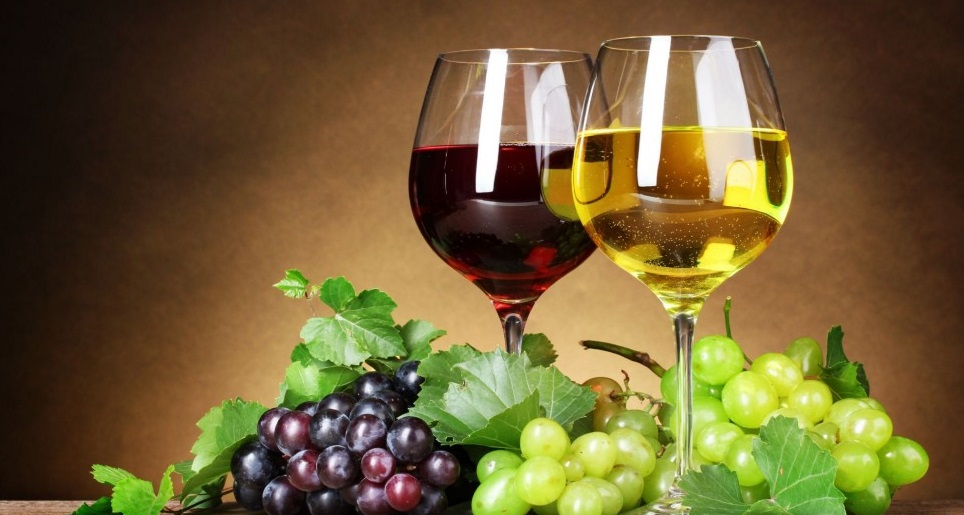

# BUSINESS UNDERSTANDING

In [1]:
# Identificar o tipo de vinho de acordo com as características inerentes de vinho tinto e branco

# DATA UNDERSTANDING

In [2]:
# Base de dados disponibilizada no kaggle para efeito de testes e estudos

[Wine dataset](https://www.kaggle.com/datasets/dell4010/wine-dataset)

# Title

In [3]:
# Aplicando machine learning em base de dados do kaggle

# Head

In [4]:
# estudando machine learning
# by geanclm em 20/02/2022 at 11:47h
# update by geanclm on 24/10/2023

# Local files

In [311]:
!dir

 O volume na unidade C ‚ Windows
 O N£mero de S‚rie do Volume ‚ 9241-82D4

 Pasta de C:\Users\geanc\OneDrive\Documentos\GitHub\machine-learning

31/10/2023  13:59    <DIR>          .
29/10/2023  16:48    <DIR>          ..
24/10/2023  09:36                68 .gitattributes
30/10/2023  21:44    <DIR>          .ipynb_checkpoints
30/10/2023  21:42    <DIR>          balanceamento_dados
24/10/2023  09:36             1.091 LICENSE
31/10/2023  13:59           376.582 ML_vinhos_csv.ipynb
24/10/2023  09:36                50 README.md
24/10/2023  10:10           132.201 Vinho-Tinto-e-Vinho-Branco.jpg
24/10/2023  09:36           384.016 wine_dataset.csv
               6 arquivo(s)        894.008 bytes
               4 pasta(s)   882.457.620.480 bytes dispon¡veis


# Library installation

In [6]:
# !pip install -U imbalanced-learn
# !pip install imblearn

# Import libs

In [402]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

# balancemaneto dos dados em relação ao MAIOR valor de y
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

# balancemaneto dos dados em relação ao MENOR valor de y
from imblearn.under_sampling import RandomUnderSampler

# Padronizar os dados
from sklearn.preprocessing import StandardScaler

# Normalizar os dados
from sklearn.preprocessing import MinMaxScaler

# Load data

In [8]:
df = pd.read_csv(r'C:\Users\geanc\OneDrive\Documentos\GitHub\machine-learning\wine_dataset.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  style                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [10]:
df.dtypes[df.dtypes.values == 'object'].index

Index(['style'], dtype='object')

In [11]:
df.sample(15).T

3423     868     47       4317    2570     5057  \
fixed_acidity            6.5      6.8     8.7      5.2     6.0      5.8   
volatile_acidity        0.32     0.56    0.29     0.28    0.27     0.32   
citric_acid             0.12     0.22    0.52     0.29    0.19      0.2   
residual_sugar          11.5      1.8     1.6      1.1     1.7      2.6   
chlorides              0.033    0.074   0.113    0.028    0.02    0.027   
free_sulfur_dioxide     35.0     15.0    12.0     18.0    24.0     17.0   
total_sulfur_dioxide   165.0     24.0    37.0     69.0   110.0    123.0   
density               0.9974  0.99438  0.9969  0.99168  0.9898  0.98936   
pH                      3.22      3.4    3.25     3.24    3.32     3.36   
sulphates               0.32     0.82    0.58     0.54    0.47     0.78   
alcohol                  9.0     11.2     9.5     10.0    12.6     13.9   
quality                    5        6       5        6       7        7   
style                  white      red     red    white   white    white   

                         6258     5314    598    5587     319     698   \
fixed_acidity             6.6      6.5     8.5    6.1      9.6     9.4   
volatile_acidity         0.25     0.35   0.585    0.2     0.77   0.615   
citric_acid              0.25     0.38    0.18   0.17     0.12    0.28   
residual_sugar            1.3      7.4     2.1    1.6      2.9     3.2   
chlorides                0.04    0.036   0.078  0.048    0.082   0.087   
free_sulfur_dioxide      28.0     20.0     5.0   46.0     30.0    18.0   
total_sulfur_dioxide     85.0    196.0    30.0  129.0     74.0    72.0   
density               0.98984  0.99712  0.9967  0.991  0.99865  1.0001   
pH                       2.87     3.47     3.2    3.3      3.3    3.31   
sulphates                0.48     0.48    0.48   0.43     0.64    0.53   
alcohol                  11.2      9.1     9.8   11.4     10.4     9.7   
quality                     6        6       6      6        6       5   
style                   white    white     red  white      red     red   

                        4991     204    2462  
fixed_acidity            6.7      7.0    6.2  
volatile_acidity        0.38     0.43   0.28  
citric_acid             0.26     0.36   0.33  
residual_sugar          9.55      1.6    1.7  
chlorides              0.036    0.089  0.029  
free_sulfur_dioxide     35.0     14.0   24.0  
total_sulfur_dioxide    91.0     37.0  111.0  
density               0.9919  0.99615   0.99  
pH                      2.98     3.34   3.24  
sulphates               0.37     0.56    0.5  
alcohol                 12.4      9.2   12.1  
quality                    6        6      6  
style                  white      red  white

In [12]:
df.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality style  
0      9.4        5   red  
1      9.8        5   red  
2      9.8        5   red  
3      9.8        6   red  
4      9.4        5   red

In [13]:
# filtrar dado específico do data frame
df.loc[0:4,'fixed_acidity']

0     7.4
1     7.8
2     7.8
3    11.2
4     7.4
Name: fixed_acidity, dtype: float64

In [14]:
df.shape

(6497, 13)

In [15]:
df.describe().T

count        mean        std      min       25%  \
fixed_acidity         6497.0    7.215307   1.296434  3.80000   6.40000   
volatile_acidity      6497.0    0.339666   0.164636  0.08000   0.23000   
citric_acid           6497.0    0.318633   0.145318  0.00000   0.25000   
residual_sugar        6497.0    5.443235   4.757804  0.60000   1.80000   
chlorides             6497.0    0.056034   0.035034  0.00900   0.03800   
free_sulfur_dioxide   6497.0   30.525319  17.749400  1.00000  17.00000   
total_sulfur_dioxide  6497.0  115.744574  56.521855  6.00000  77.00000   
density               6497.0    0.994697   0.002999  0.98711   0.99234   
pH                    6497.0    3.218501   0.160787  2.72000   3.11000   
sulphates             6497.0    0.531268   0.148806  0.22000   0.43000   
alcohol               6497.0   10.491801   1.192712  8.00000   9.50000   
quality               6497.0    5.818378   0.873255  3.00000   5.00000   

                            50%        75%        max  
fixed_acidity           7.00000    7.70000   15.90000  
volatile_acidity        0.29000    0.40000    1.58000  
citric_acid             0.31000    0.39000    1.66000  
residual_sugar          3.00000    8.10000   65.80000  
chlorides               0.04700    0.06500    0.61100  
free_sulfur_dioxide    29.00000   41.00000  289.00000  
total_sulfur_dioxide  118.00000  156.00000  440.00000  
density                 0.99489    0.99699    1.03898  
pH                      3.21000    3.32000    4.01000  
sulphates               0.51000    0.60000    2.00000  
alcohol                10.30000   11.30000   14.90000  
quality                 6.00000    6.00000    9.00000

In [16]:
df['style']

0         red
1         red
2         red
3         red
4         red
        ...  
6492    white
6493    white
6494    white
6495    white
6496    white
Name: style, Length: 6497, dtype: object

<center style="font-size:18pt; background-color:#0f79b6">
    <br/>
        <b style="color: #ffffff">
            DATA PREPARATION
        </b>
    <br/>&nbsp;
</center>

In [17]:
df['style'] = df['style'].replace('red', 0)
df['style'] = df['style'].replace('white', 1)

In [18]:
df.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  style  
0      9.4        5      0  
1      9.8        5      0  
2      9.8        5      0  
3      9.8        6      0  
4      9.4        5      0

In [19]:
# 1 - VERIFICAR NECESSIDADE DE APLICAR O GET DUMMIES
# df_d = pd.get_dummies(df)
# df_d.sample(5)

# DATA VISUALIZATION

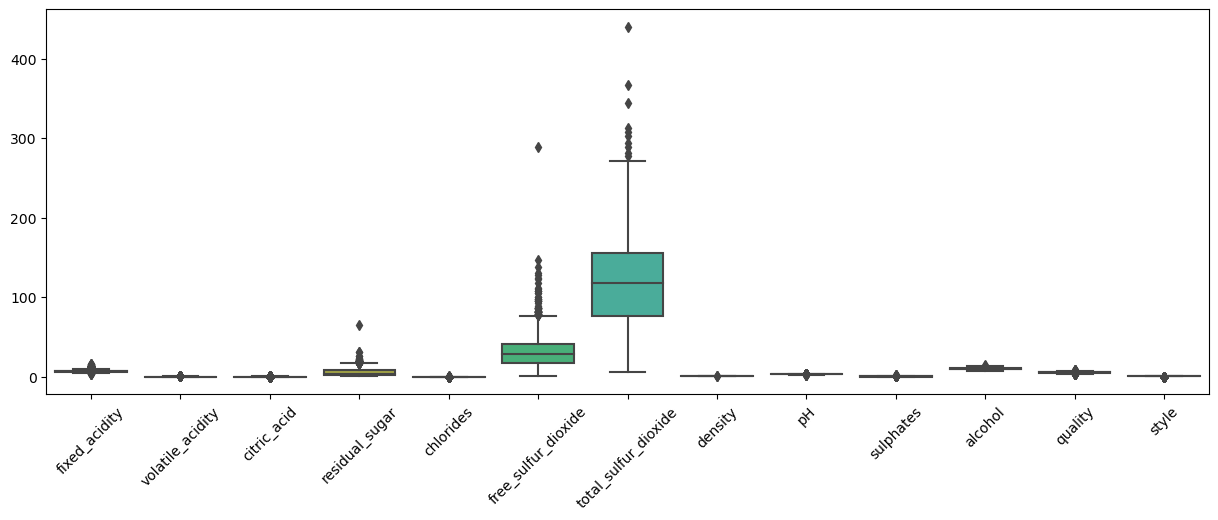

In [20]:
plt.figure(figsize=(15,5))
ax = sns.boxplot(data=df)

# Rotacionar a legenda do eixo x em 45 graus
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.show();

<center style="font-size:18pt; background-color:#0f79b6">
    <br/>
        <b style="color: #ffffff">
            MODELING
        </b>
    <br/>&nbsp;
</center>

In [21]:
# Divisão dos dados em X e y
X = df.drop('style', axis = 1)
y = df['style']
X.shape, y.shape

((6497, 12), (6497,))

In [312]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [22]:
y.mean()

0.7538864091118977

In [24]:
df.groupby('style').size()

style
0    1599
1    4898
dtype: int64

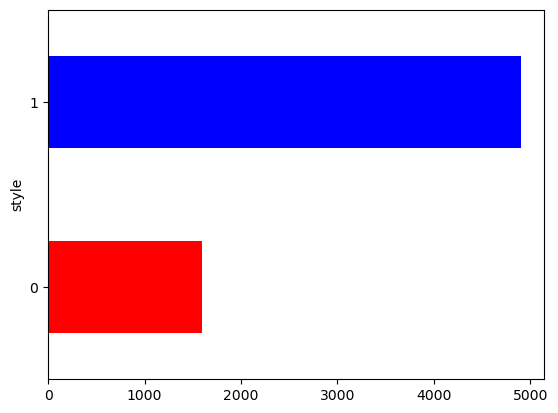

In [25]:
y.value_counts(ascending=True).plot(kind = 'barh', color = ['red','blue']);

In [84]:
y.value_counts()

style
1    4898
0    1599
Name: count, dtype: int64

# Data balancing

In [147]:
# balancemaneto dos dados em relação ao MAIOR valor de y
smote_ball = SMOTE()
X_bal, y_bal = smote_ball.fit_resample(X, y)

# balancemaneto dos dados em relação ao MENOR valor de y
# rus = RandomUnderSampler()
# X_bal, y_bal = rus.fit_resample(X, y)

In [148]:
X.shape, X_tr.shape, X_ts.shape, X_bal.shape

((6497, 12), (2238, 12), (960, 12), (9796, 12))

In [149]:
y.shape, y_tr.shape, y_ts.shape, y_bal.shape

((6497,), (2238,), (960,), (9796,))

In [150]:
y_bal.value_counts()

style
0    4898
1    4898
Name: count, dtype: int64

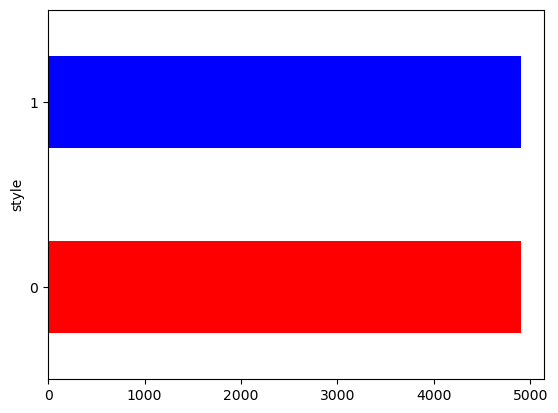

In [151]:
y_bal.value_counts(ascending=True).plot(kind = 'barh', color = ['red','blue']);

# Standardization

In [401]:
obj_padronizado = StandardScaler().fit(X_bal)
df_padronizado = obj_padronizado.transform(X_bal)
df_padronizado = pd.DataFrame(df_padronizado)
df_padronizado.columns = list(X_bal.columns)
df_padronizado.head()

In [340]:
df_padronizado.describe().T

count          mean       std       min       25%  \
fixed_acidity         9796.0 -1.160543e-17  1.000051 -2.541709 -0.659145   
volatile_acidity      9796.0 -1.856870e-16  1.000051 -1.757928 -0.779475   
citric_acid           9796.0 -1.160543e-17  1.000051 -1.902863 -0.572977   
residual_sugar        9796.0 -1.044489e-16  1.000051 -0.917294 -0.605883   
chlorides             9796.0 -1.972924e-16  1.000051 -1.491754 -0.613526   
free_sulfur_dioxide   9796.0 -6.963261e-17  1.000051 -1.436170 -0.791472   
total_sulfur_dioxide  9796.0  9.284348e-17  1.000051 -1.448785 -0.916531   
density               9796.0 -1.871957e-14  1.000051 -2.966597 -0.688201   
pH                    9796.0  3.365576e-16  1.000051 -3.341248 -0.687771   
sulphates             9796.0 -1.160543e-17  1.000051 -2.238182 -0.652224   
alcohol               9796.0  1.270795e-15  1.000051 -2.195551 -0.846717   
quality               9796.0  2.901359e-16  1.000051 -3.176793 -0.801956   

                           50%       75%        max  
fixed_acidity        -0.199504  0.416606   5.593656  
volatile_acidity     -0.235890  0.742562   6.395845  
citric_acid          -0.003025  0.621566   8.609572  
residual_sugar       -0.486109  0.304396  14.701177  
chlorides            -0.159888  0.371886  14.058038  
free_sulfur_dioxide  -0.205382  0.556535  15.443214  
total_sulfur_dioxide -0.049421  0.733354   5.836200  
density               0.154449  0.696188  15.615229  
pH                   -0.026592  0.690220   4.808718  
sulphates            -0.116013  0.489667   9.053844  
alcohol              -0.217261  0.681640   4.009086  
quality               0.385463  0.385463   3.947718

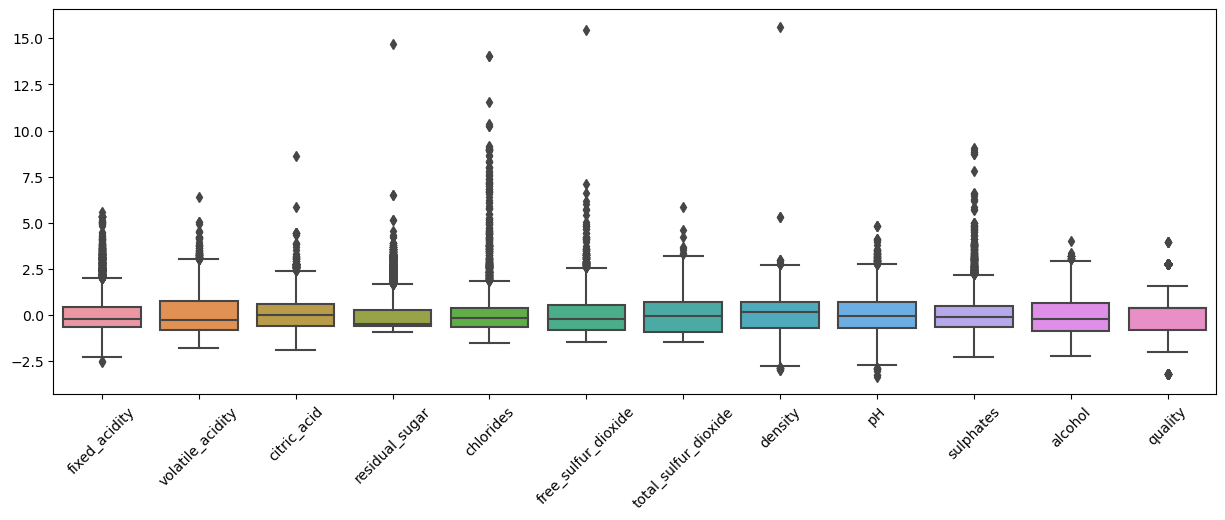

In [341]:
plt.figure(figsize=(15,5))
ax = sns.boxplot(data=df_padronizado)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# Normalization

In [411]:
obj_normalizado = MinMaxScaler().fit(X_bal)
df_normalizado = obj_normalizado.transform(X_bal)
df_normalizado = pd.DataFrame(df_normalizado)
df_normalizado.columns = list(X_bal.columns)
df_normalizado.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0       0.297521          0.413333     0.000000        0.019939   0.111296   
1       0.330579          0.533333     0.000000        0.030675   0.147841   
2       0.330579          0.453333     0.024096        0.026074   0.137874   
3       0.611570          0.133333     0.337349        0.019939   0.109635   
4       0.297521          0.413333     0.000000        0.019939   0.111296   

   free_sulfur_dioxide  total_sulfur_dioxide   density        pH  sulphates  \
0             0.034722              0.064516  0.206092  0.612403   0.191011   
1             0.083333              0.140553  0.186813  0.372093   0.258427   
2             0.048611              0.110599  0.190669  0.418605   0.241573   
3             0.055556              0.124424  0.209948  0.341085   0.202247   
4             0.034722              0.064516  0.206092  0.612403   0.191011   

    alcohol   quality  
0  0.202899  0.333333  
1  0.260870  0.333333  
2  0.260870  0.333333  
3  0.260870  0.500000  
4  0.202899  0.333333

In [412]:
df_normalizado.describe().T

count      mean       std  min       25%       50%  \
fixed_acidity         9796.0  0.312427  0.122926  0.0  0.231405  0.287904   
volatile_acidity      9796.0  0.215597  0.122649  0.0  0.120000  0.186667   
citric_acid           9796.0  0.181011  0.095130  0.0  0.126506  0.180723   
residual_sugar        9796.0  0.058731  0.064030  0.0  0.019939  0.027607   
chlorides             9796.0  0.095934  0.064313  0.0  0.056478  0.085652   
free_sulfur_dioxide   9796.0  0.085084  0.059247  0.0  0.038194  0.072917   
total_sulfur_dioxide  9796.0  0.198873  0.137276  0.0  0.073062  0.192089   
density               9796.0  0.159650  0.053819  0.0  0.122614  0.167962   
pH                    9796.0  0.409971  0.122706  0.0  0.325581  0.406708   
sulphates             9796.0  0.198209  0.088563  0.0  0.140449  0.187935   
alcohol               9796.0  0.353856  0.161178  0.0  0.217391  0.318841   
quality               9796.0  0.445896  0.140368  0.0  0.333333  0.500000   

                           75%  max  
fixed_acidity         0.363636  1.0  
volatile_acidity      0.306667  1.0  
citric_acid           0.240137  1.0  
residual_sugar        0.078221  1.0  
chlorides             0.119850  1.0  
free_sulfur_dioxide   0.118056  1.0  
total_sulfur_dioxide  0.299539  1.0  
density               0.197117  1.0  
pH                    0.494661  1.0  
sulphates             0.241573  1.0  
alcohol               0.463716  1.0  
quality               0.500000  1.0

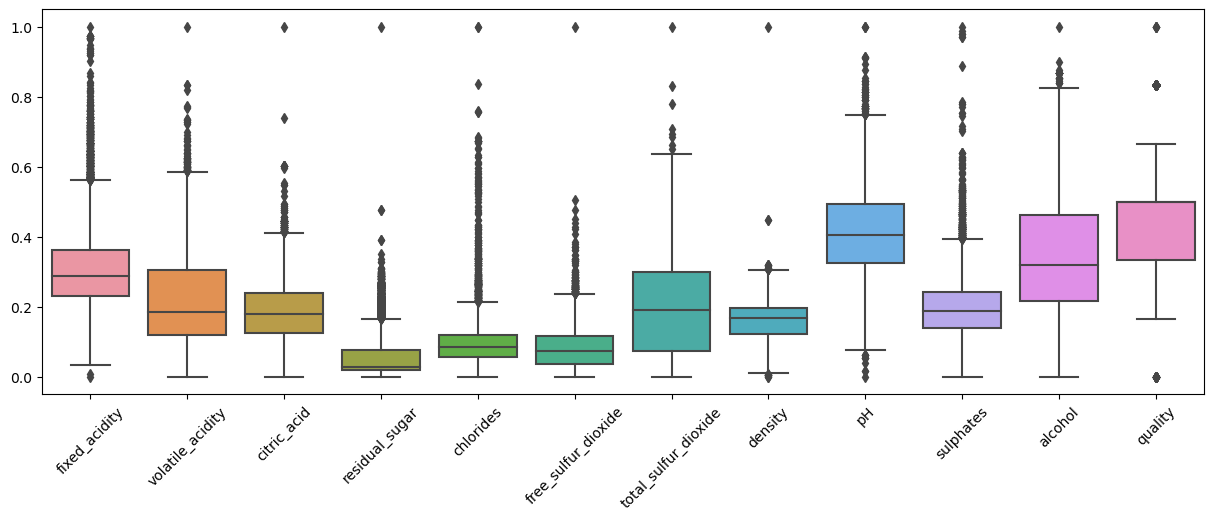

In [413]:
plt.figure(figsize=(15,5))
ax = sns.boxplot(data=df_normalizado)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [343]:
# Separar em treino e teste
VAR_PREDITORA = df_padronizado
VAR_TARGET = y_bal
from sklearn.model_selection import train_test_split as tts
X_tr, X_ts, y_tr, y_ts = tts(VAR_PREDITORA,VAR_TARGET, test_size= 0.3)
X_tr.shape, X_ts.shape, y_tr.shape, y_ts.shape, y_tr.value_counts()[0], y_tr.value_counts()[1]

((6857, 12), (2939, 12), (6857,), (2939,), 3428)

<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            Extra Trees Classifier
        </b>
    <br/>&nbsp;
</center>

[ExtraTreesClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html)

In [346]:
# Treinar o modelo
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=500, max_depth=10, n_jobs=-1)
etc.fit(X_tr, y_tr)

ExtraTreesClassifier(max_depth=10, n_estimators=500, n_jobs=-1)

In [347]:
# PROPENSÃO respectiva, nas colunas, da variável resposta ser 0 e 1
etc.predict_proba(X_ts)

array([[0.03117778, 0.96882222],
       [0.09580163, 0.90419837],
       [0.18775839, 0.81224161],
       ...,
       [0.93188618, 0.06811382],
       [0.22060979, 0.77939021],
       [0.20149248, 0.79850752]])

In [348]:
pd.DataFrame(etc.predict_proba(X_ts), columns=['Propensão 0', 'Propensão 1']).head()

Propensão 0  Propensão 1
0     0.031178     0.968822
1     0.095802     0.904198
2     0.187758     0.812242
3     0.964289     0.035711
4     0.896323     0.103677

In [349]:
etc_y_pred = etc.predict(X_ts)

# EVALUATION

In [350]:
# Max e Min
etc_y_pred.min(), etc_y_pred.max()

(0, 1)

In [351]:
# Curva ROC
roc_auc_score(y_ts, etc_y_pred)

0.9914959040117067

In [352]:
# SCORE
etc_acuracia = etc.score(X_ts, y_ts)
print("score AUTO:", etc_acuracia)

score AUTO: 0.991493705341953


In [353]:
# ACURÁCIA
etc_acuracia = accuracy_score(y_ts, etc_y_pred)
print("accuracy_score AUTO:", etc_acuracia)

accuracy_score AUTO: 0.991493705341953


In [354]:
# MATRIZ CONFUSÃO
etc_confusion_matrix = confusion_matrix(y_ts, etc_y_pred)
etc_confusion_matrix

array([[1448,   22],
       [   3, 1466]], dtype=int64)

|                     | negativo PRED 0    |    positivo PRED 1   |
|-                    |--------------------|----------------------|
| *negativo REAL 0*   |      VN            |             FP       |
| *positivo REAL 1*   |      FN            |             VP       |

In [355]:
# CÁLCULO MANUAL DA ACURÁCIA
etc_acuracia_manual = (etc_confusion_matrix[0][0] + etc_confusion_matrix[1][1])/(etc_confusion_matrix[0][0] + etc_confusion_matrix[0][1] + etc_confusion_matrix[1][0] + etc_confusion_matrix[1][1])
print(f'Acurácia MANUAL:, {etc_acuracia_manual}')

Acurácia MANUAL:, 0.991493705341953


In [356]:
print(classification_report(y_ts, etc_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1470
           1       0.99      1.00      0.99      1469

    accuracy                           0.99      2939
   macro avg       0.99      0.99      0.99      2939
weighted avg       0.99      0.99      0.99      2939



In [357]:
etc_f1_score = f1_score(y_ts, etc_y_pred)
etc_f1_score

0.9915454852891443

In [398]:
X_ts[400:413].T

366       1520      380       9357      4590  \
fixed_acidity         3.509389 -0.726380  0.483840 -0.445721 -0.860848   
volatile_acidity      1.150251  0.688204 -0.779475  0.610673 -0.181532   
citric_acid           2.276780 -1.522895  0.756910 -0.857101 -0.129681   
residual_sugar        0.328351 -0.581928 -0.581928 -0.605883  0.448124   
chlorides             0.419683 -0.096922  0.342192  0.470402 -0.845998   
free_sulfur_dioxide  -1.084517  0.204881 -0.850081 -0.967299  1.142624   
total_sulfur_dioxide -0.844500 -0.810929 -1.096286 -1.166355  1.001924   
density               2.439220 -0.179502  0.719676  0.177521 -1.178987   
pH                   -1.130017  0.828502 -0.245524  0.836612  0.259900   
sulphates             0.997173  1.631557  1.441242 -0.717973 -0.715662   
alcohol              -0.397105 -0.127338 -0.936639 -1.149473  1.041651   
quality               1.572881  0.385463  0.385463 -1.989375  1.572881   

                          4034      1369      4413      6804      8161  \
fixed_acidity        -0.793614 -0.659145 -0.591911 -0.170234  1.242978   
volatile_acidity     -0.290249  1.123072 -1.159985  1.528639  1.392096   
citric_acid           0.313614 -1.902863  0.566926 -0.823222  0.025762   
residual_sugar        0.280442 -0.677747 -0.821475  0.823044 -0.527050   
chlorides            -0.845998  0.058059 -0.897659  0.191473  1.284295   
free_sulfur_dioxide  -0.967299 -1.260343 -0.674254  0.713018 -1.201735   
total_sulfur_dioxide  0.934782 -1.415214 -0.357716 -0.143250 -1.213785   
density              -0.351457 -0.512664 -2.246538  1.035839  0.655064   
pH                   -0.498236  0.512612  0.386256  0.632850 -0.504209   
sulphates            -0.461909 -1.286607 -1.223169 -0.581388  0.436610   
alcohol              -0.576950 -0.037416  2.300563 -1.006480 -0.301296   
quality              -1.989375 -1.989375  1.572881 -0.801956 -0.801956   

                          1167      7018      5199  
fixed_acidity         0.416606  2.819684 -0.524676  
volatile_acidity     -0.398966 -0.113336 -1.540494  
citric_acid           0.566926  2.449256 -0.003025  
residual_sugar       -0.462155 -0.148088  2.029135  
chlorides             0.187211  0.103710 -0.458545  
free_sulfur_dioxide   0.204881 -1.055105  0.380708  
total_sulfur_dioxide -0.743786 -0.928490 -0.072359  
density              -0.039789  1.521136  0.411591  
pH                    0.449434 -0.150642 -0.308702  
sulphates             1.948749  0.443072 -1.413484  
alcohol               1.761029  2.097499 -0.487028  
quality               1.572881  1.572881  0.385463

In [399]:
selection = list(y_ts[400:413].values)
print(selection)

[0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1]


In [400]:
prediction = list(etc.predict(X_ts[400:413]))
print(prediction)

[0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1]


In [361]:
if (selection != prediction): 
    # imprimir dataframe com PREVISÃO diferente da variável real de referência
    resultados = []
    for i, (a, b) in enumerate(zip(selection, prediction)):
        if a != b:
    #         print(f"Posição {i}: {a} != {b}")
            resultados.append([i, a, b])
    dfp = pd.DataFrame(resultados, columns=["seq", "selection", "prediction"])
    display (dfp)
    display (dfp.predictio.value_counts())
else:
    print(f'O modelo previu corretamente os resultados em relação a variável "y_ts"')
    print(list(set(selection) - set(prediction)))

O modelo previu corretamente os resultados em relação a variável "y_ts"
[]


# VISUAL

In [362]:
# PROPENSÃO (NÃO É probabilidade)
pred = etc.predict_proba(X_ts)[:,1]

In [363]:
pred.min(), pred.max()

(0.004612624665167951, 0.9962821127067639)

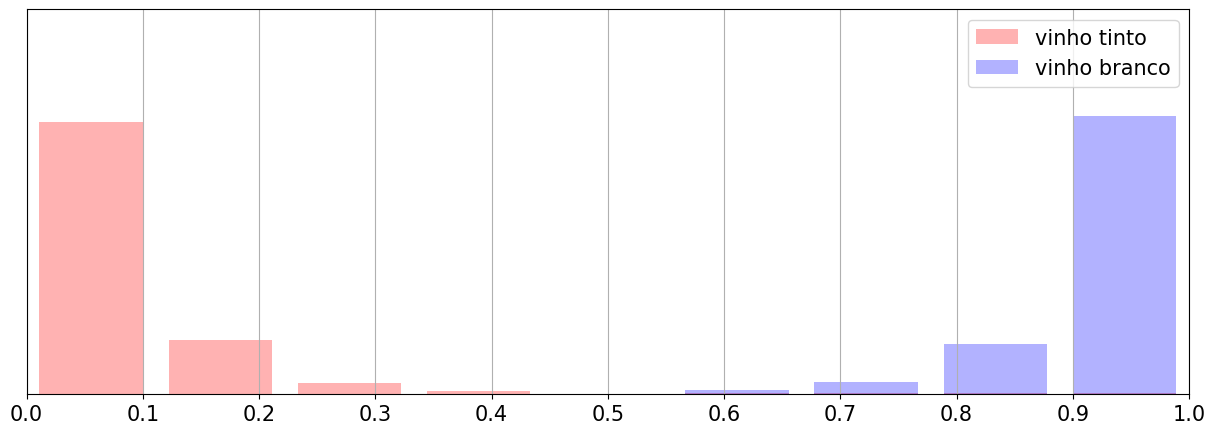

In [364]:
plt.figure(figsize=(15,5))
plt.hist(pred[y_ts==0], bins=np.linspace(0,1,10), density=True, color='r', alpha=.3, rwidth=.8, label='vinho tinto')
plt.hist(pred[y_ts==1], bins=np.linspace(0,1,10), density=True, color='b', alpha=.3, rwidth=.8, label='vinho branco')

plt.xlim(0, 1)
plt.ylim(0, 10)

plt.xticks(np.arange(0,1.1,0.1), fontsize=15)
plt.yticks([])
plt.legend(fontsize=15)
plt.grid();

# PERSISTENCE

# DEPLOYMENT

<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            KNeighbors Classifier
        </b>
    <br/>&nbsp;
</center>

[KNeighbors Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [365]:
# Treinar o modelo
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_tr, y_tr)

KNeighborsClassifier(n_neighbors=3)

In [366]:
neigh_y_pred = neigh.predict(X_ts)

In [367]:
# MATRIZ CONFUSÃO
neigh_confusion_matrix = confusion_matrix(y_ts, neigh_y_pred)
neigh_confusion_matrix

array([[1454,   16],
       [  16, 1453]], dtype=int64)

In [368]:
# ACURÁCIA
neigh_acuracia = accuracy_score(y_ts, neigh_y_pred)
print("Acurácia:", neigh_acuracia)

Acurácia: 0.9891119428376999


In [369]:
print(classification_report(y_ts, neigh_y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1470
           1       0.99      0.99      0.99      1469

    accuracy                           0.99      2939
   macro avg       0.99      0.99      0.99      2939
weighted avg       0.99      0.99      0.99      2939



In [370]:
neigh_f1_score = f1_score(y_ts, neigh_y_pred)
neigh_f1_score

0.9891082368958475

<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            Decision Tree Classifier
        </b>
    <br/>&nbsp;
</center>

[Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [371]:
# Treinar o modelo
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_tr, y_tr)

DecisionTreeClassifier()

In [372]:
dtc_y_pred = dtc.predict(X_ts)

In [373]:
# MATRIZ CONFUSÃO
dtc_confusion_matrix = confusion_matrix(y_ts, dtc_y_pred)
dtc_confusion_matrix

array([[1446,   24],
       [  28, 1441]], dtype=int64)

In [374]:
# ACURÁCIA
dtc_acuracia = accuracy_score(y_ts, dtc_y_pred)
print("Acurácia:", dtc_acuracia)

Acurácia: 0.9823069071112623


In [375]:
print(classification_report(y_ts, dtc_y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1470
           1       0.98      0.98      0.98      1469

    accuracy                           0.98      2939
   macro avg       0.98      0.98      0.98      2939
weighted avg       0.98      0.98      0.98      2939



In [376]:
dtc_f1_score = f1_score(y_ts, dtc_y_pred)
dtc_f1_score

0.9822767552828903

<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            Logistic Regression
        </b>
    <br/>&nbsp;
</center>

[Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [377]:
# Treinar o modelo
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0, max_iter =1500)
lr.fit(X_tr, y_tr)

LogisticRegression(max_iter=1500, random_state=0)

In [378]:
lr_y_pred = lr.predict(X_ts)

In [379]:
# MATRIZ CONFUSÃO
lr_confusion_matrix = confusion_matrix(y_ts, lr_y_pred)
lr_confusion_matrix

array([[1450,   20],
       [   9, 1460]], dtype=int64)

In [380]:
# ACURÁCIA
lr_acuracia = accuracy_score(y_ts, lr_y_pred)
print("Acurácia:", lr_acuracia)

Acurácia: 0.9901326981966655


In [381]:
print(classification_report(y_ts, lr_y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1470
           1       0.99      0.99      0.99      1469

    accuracy                           0.99      2939
   macro avg       0.99      0.99      0.99      2939
weighted avg       0.99      0.99      0.99      2939



In [382]:
lr_f1_score = f1_score(y_ts, lr_y_pred)
lr_f1_score

0.9901661580196678

<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            Random Forest Classifier
        </b>
    <br/>&nbsp;
</center>

[Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [383]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1_000, max_depth=8, n_jobs=-1)
rf.fit(X_tr, y_tr)

RandomForestClassifier(max_depth=8, n_estimators=1000, n_jobs=-1)

In [384]:
rf_y_pred = lr.predict(X_ts)

In [385]:
# MATRIZ CONFUSÃO
rf_confusion_matrix = confusion_matrix(y_ts, rf_y_pred)
rf_confusion_matrix

array([[1450,   20],
       [   9, 1460]], dtype=int64)

In [386]:
# ACURÁCIA
rf_acuracia = accuracy_score(y_ts, rf_y_pred)
print("Acurácia:", rf_acuracia)

Acurácia: 0.9901326981966655


In [387]:
print(classification_report(y_ts, rf_y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1470
           1       0.99      0.99      0.99      1469

    accuracy                           0.99      2939
   macro avg       0.99      0.99      0.99      2939
weighted avg       0.99      0.99      0.99      2939



In [388]:
rf_f1_score = f1_score(y_ts, lr_y_pred)
rf_f1_score

0.9901661580196678

<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            Avaliação geral de todos os Modelos
        </b>
    <br/>&nbsp;
</center>

In [389]:
dfm = {
    'modelo':['Extra Trees Classifier', 'KNeighbors Classifier', 'Decision Tree Classifier',
              'Logistic Regression', 'Random Forest Classifier'],
    'acurácia':[etc_acuracia,neigh_acuracia,dtc_acuracia,lr_acuracia, rf_acuracia],
    'f1_score':[etc_f1_score,neigh_f1_score,dtc_f1_score,lr_f1_score, rf_f1_score]
    }    
modelos = pd.DataFrame(dfm)

In [390]:
# modelos.sort_values('f1_score', ascending=False)
modelos.style.highlight_max(subset=['acurácia','f1_score'])